<a href="https://colab.research.google.com/github/subthalamic/STATS/blob/main/theory/descriptive_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
from random import sample
init_printing(use_latex=True)

In [2]:
np.random.seed(15)
p = np.random.normal(100, 15, 10**6)

In [3]:
np.mean(p)

In [4]:
np.std(p)

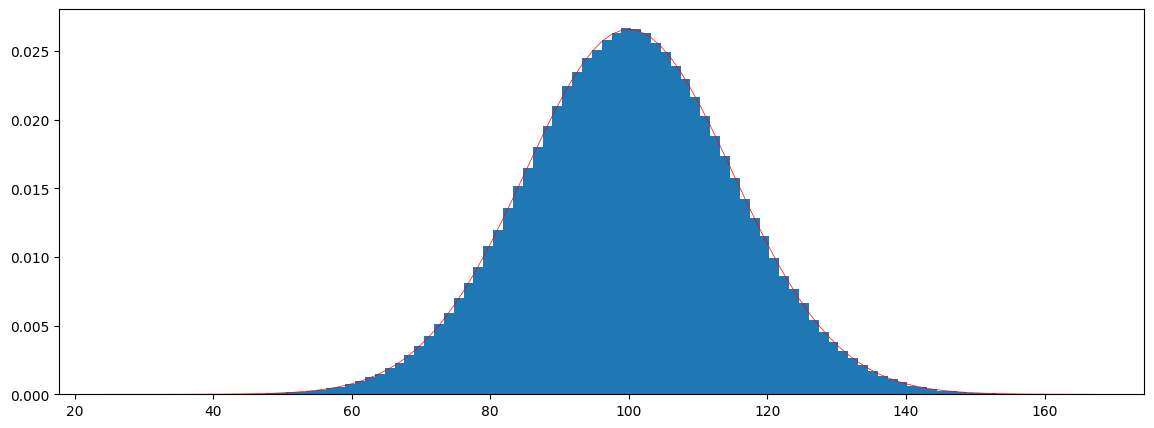

In [5]:
plt.figure(figsize = (14,5))
count, bins, ignored = plt.hist(p, 100, density=True)
plt.plot(bins, 1/(np.std(p) * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - np.mean(p))**2 / (2 * np.std(p)**2)),
         linewidth=0.5, color='r')
plt.show()

<Axes: ylabel='Count'>

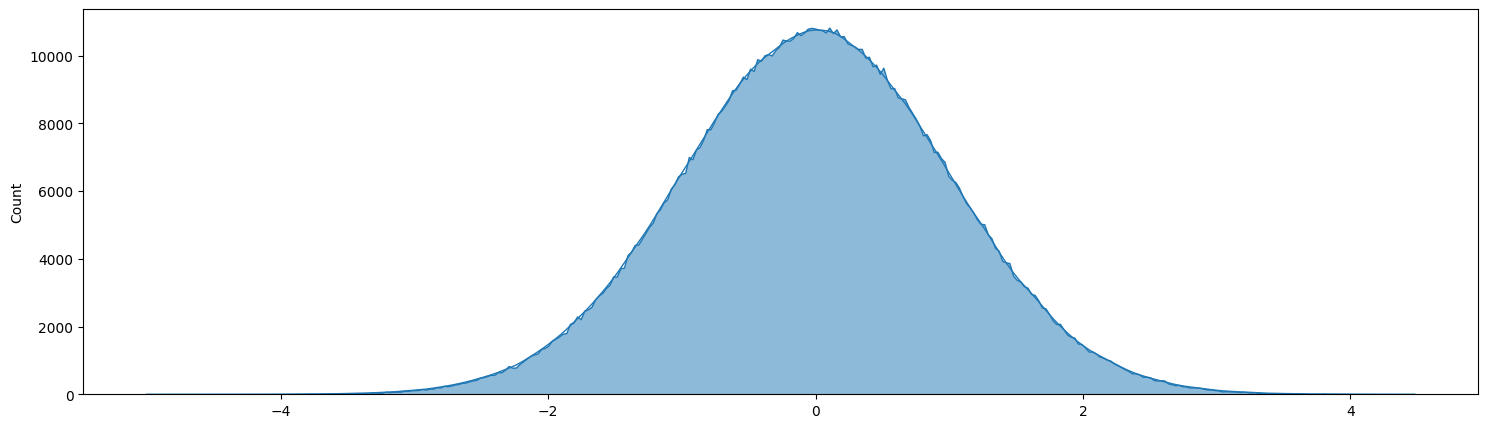

In [83]:
plt.subplots(figsize=(18,5))
sns.histplot(stats.zscore(p), element = 'poly', kde = True, line_kws = dict(linewidth=1, color='red'))

In [8]:
p[39]

In [61]:
stats.zscore(p)[39]

In [7]:
((p-np.mean(p))/np.std(p))[39]

### stats.norm.cdf calculates the area under the normal distribution that is left of a value
### which is also the probability that a value is greater that another random value,
### or the percent of values that this value is greater than.
### outputs values between 0 and 1

In [62]:
stats.norm.cdf(2.04)

In [9]:
stats.norm.cdf(stats.zscore(p)[39])

In [77]:
stats.norm.cdf(1)-stats.norm.cdf(-1)   #68% of values fall within one standard deviation from the mean

In [84]:
stats.norm.cdf(2)-stats.norm.cdf(-2)   #two stadard deviations

In [79]:
stats.norm.cdf(3)-stats.norm.cdf(-3)   #three standard deviations

In [80]:
stats.norm.cdf(4)-stats.norm.cdf(-4)   #four standard deviations

In [81]:
stats.norm.cdf(5)-stats.norm.cdf(-5)   #five stadard deviations

### ppf is the inverse of cdf, it calculates which value is greater than the input percent
### also used to calculate quantiles
### takes inputs from 0 and 1

In [65]:
stats.norm.ppf(0.5)

In [10]:
stats.norm.ppf(0.05)

In [11]:
stats.norm.ppf(0.95)

## Quantiles

<Axes: >

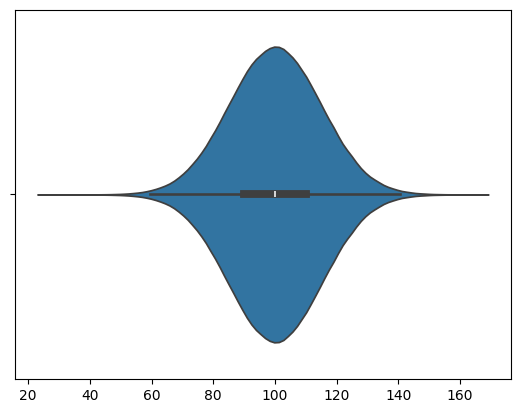

In [90]:
sns.violinplot(x=p) #, inner="quart")    violinplots display the mean and quartiles

### Quartiles

In [91]:
stats.norm.ppf(0)

In [101]:
stats.norm.ppf(0.25)       #first quartile

In [102]:
stats.norm.ppf(0.5)        #median

In [103]:
stats.norm.ppf(0.75)       #third quartile

In [98]:
stats.norm.ppf(1)

### Percentiles

In [70]:
np.quantile(stats.zscore(p), [0,0.25,0.5,0.75,1])

array([-5.00266527e+00, -6.75161348e-01,  2.70209776e-04,  6.75210769e-01,
        4.48065923e+00])

In [23]:
np.quantile(p, [0,0.25,0.5,0.75,1])       #these are specific values

array([ 24.91242224,  89.86863552, 100.00692242, 110.13783939,
       167.25795446])

### How to calculate quantiles

In [115]:
np.median(p)

In [134]:
np.sort(p)[500000]

In [136]:
int((len(p)+1)*0.25)

In [137]:
np.sort(p)[int((len(p)+1)*0.25)]

### Percentiles

In [114]:
for i in range(1, 100):
    print(i/100, ': ', stats.norm.ppf(i/100), end=' ')

0.01 :  -2.3263478740408408 0.02 :  -2.053748910631823 0.03 :  -1.880793608151251 0.04 :  -1.75068607125217 0.05 :  -1.6448536269514729 0.06 :  -1.5547735945968535 0.07 :  -1.4757910281791706 0.08 :  -1.4050715603096329 0.09 :  -1.3407550336902165 0.1 :  -1.2815515655446004 0.11 :  -1.2265281200366098 0.12 :  -1.1749867920660904 0.13 :  -1.1263911290388007 0.14 :  -1.0803193408149558 0.15 :  -1.0364333894937898 0.16 :  -0.994457883209753 0.17 :  -0.9541652531461943 0.18 :  -0.915365087842814 0.19 :  -0.8778962950512288 0.2 :  -0.8416212335729142 0.21 :  -0.8064212470182404 0.22 :  -0.7721932141886848 0.23 :  -0.7388468491852137 0.24 :  -0.7063025628400874 0.25 :  -0.6744897501960817 0.26 :  -0.643345405392917 0.27 :  -0.6128129910166272 0.28 :  -0.5828415072712162 0.29 :  -0.5533847195556729 0.3 :  -0.5244005127080409 0.31 :  -0.4958503473474533 0.32 :  -0.46769879911450823 0.33 :  -0.4399131656732338 0.34 :  -0.41246312944140473 0.35 :  -0.38532046640756773 0.36 :  -0.3584587932511938

In [143]:
for i in range(1, 100):
    print(i, ': ', np.sort(p)[int((len(p)+1)*(i/100))], end=' ')

1 :  65.08018498093308 2 :  69.1956376815379 3 :  71.78605204912569 4 :  73.71221927865389 5 :  75.30587317718847 6 :  76.65924265990598 7 :  77.85204881897974 8 :  78.92117409700765 9 :  79.86654556980653 10 :  80.76016607975983 11 :  81.59063767948616 12 :  82.36168679642981 13 :  83.0917992864664 14 :  83.78617435920792 15 :  84.43568921452741 16 :  85.0613395234448 17 :  85.67219533953472 18 :  86.25352907779022 19 :  86.81397762557023 20 :  87.36832056111993 21 :  87.88984543592058 22 :  88.40586797386526 23 :  88.90665116322019 24 :  89.38992099644302 25 :  89.86866375318286 26 :  90.34216955780798 27 :  90.79526576660268 28 :  91.24377821644038 29 :  91.68202479891866 30 :  92.1157242757347 31 :  92.54859460371108 32 :  92.96670514288479 33 :  93.38772760658338 34 :  93.7951025019648 35 :  94.20362859646902 36 :  94.60948879016937 37 :  95.00951703970051 38 :  95.4129584425804 39 :  95.81160326461999 40 :  96.20424807809906 41 :  96.58706293501803 42 :  96.97449752923414 43 :  9

In [68]:
sample(list(p), 5)

In [20]:
sample(list(p), 5)